# Logic Gates

In this project, I will delve into the world of perceptrons, aiming to model the fundamental building blocks of computers known as logic gates. Logic gates are elementary components that underlie the operations performed by digital computers. This project serves as a hands-on exploration of how perceptrons can be employed to emulate the behavior of logic gates.

**Key Project Objectives:**

1. **Logic Gates Overview**: I will start by understanding the fundamental concept of logic gates, which are responsible for performing logical operations in computing. Logic gates such as AND, OR, and XOR play a pivotal role in digital circuits by manipulating binary data (0s and 1s). 

2. **Modeling an AND Gate**: I will explore how an AND gate can be represented as a dataset of four points, where each point corresponds to a possible input combination (0 or 1). These points will be associated with labels representing the output of the AND gate for each input combination. The challenge here is to demonstrate that this data is linearly separable, making it suitable for a perceptron to learn and predict.

3. **Building a Perceptron**: I will create a perceptron, a simple type of artificial neural network, to learn the behavior of an AND gate. The perceptron will be trained on the dataset to understand how AND gate logic can be approximated using a linear model.

4. **Model Evaluation**: I will evaluate the perceptron's performance by measuring its accuracy on the training data. Since the dataset is relatively small and contains all possible inputs, it provides an opportunity to assess how well the perceptron can learn and predict the behavior of the AND gate.

5. **Exploring XOR and OR Gates**: After successfully modeling an AND gate, I will experiment with XOR and OR gates, which are known to be more complex due to their non-linearity. I will visualize the perceptron's decision boundaries and evaluate its accuracy in these scenarios to observe how perceptrons handle non-linear separability.

6. **Visualizing Decision Boundaries**: To gain deeper insights into the perceptron's decision-making process, I will visualize the decision boundaries it creates for different logic gates. I will examine how close data points are to these boundaries and depict this information using heatmaps.

By the end of this project, I aim to showcase the versatility of perceptrons in modeling logic gates and illustrate how they can approximate complex logical operations, paving the way for more sophisticated neural networks capable of solving intricate problems.

![text](images/logic_gates.svg)

-----

## Import Libraries

In [90]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from itertools import product
import numpy as np

## Creating and visualizing AND Data

In [91]:
# Create Data
data = [[0,0], [1,0], [0,1], [1,1]]
labels = [0, 0, 0, 1]

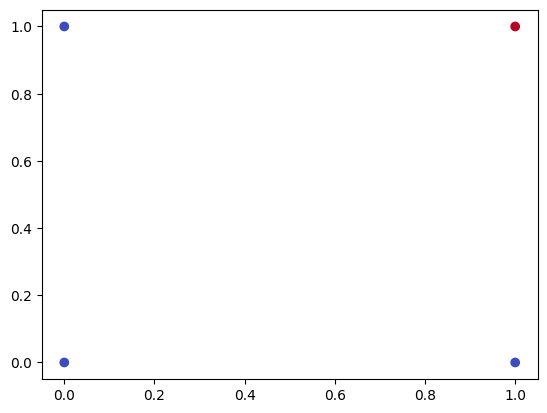

In [108]:
# Plot Data
plt.scatter([point[0] for point in data], 
            [point[1] for point in data], 
            c=labels,
            cmap='coolwarm')

## Building the Perceptron

In [93]:
# Create a Perceptron object named classifier
classifier = Perceptron(max_iter=40, random_state=22)

# Train the model
classifier.fit(data, labels)

# Validate the model
print("Accurarcy: ", classifier.score(data, labels))

Accurarcy:  1.0


**Summary:** 
The accuracy of the perceptron for our AND gate data is 100%. The data is linearly separable.

## Creating and visualizing XOR Data

In [94]:
# Create Data
data = [[0,0], [1,0], [0,1], [1,1]]
labels = [0, 1, 1, 0]

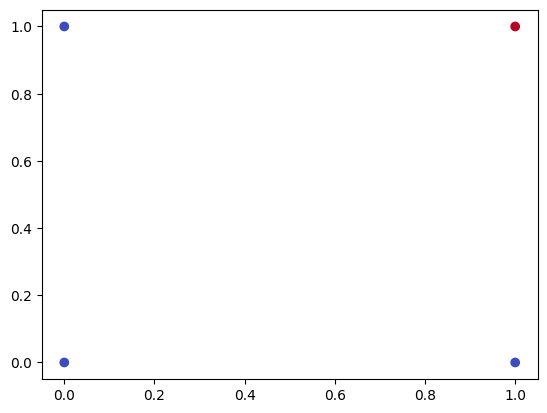

In [107]:
# Plot Data
plt.scatter([point[0] for point in data], 
            [point[1] for point in data], 
            c=labels,
            cmap='coolwarm')

In [96]:
# Create a Perceptron object named classifier
classifier = Perceptron(max_iter=40, random_state=22)

# Train the model
classifier.fit(data, labels)

# Validate the model
print("Accurarcy: ", classifier.score(data, labels))

Accurarcy:  0.5


**Summary:** 
The accuracy of the perceptron for our XOR gate data is 50%. Meaning, the perceptron only got the correct answer 50% of the time right. The data is not linearly separable.

## Creating and visualizing OR Data

In [97]:
# Create Data
data = [[0,0], [1,0], [0,1], [1,1]]
labels = [0, 1, 1, 1]

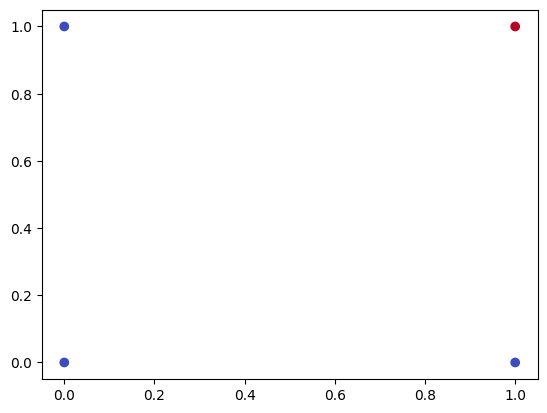

In [106]:
# Plot Data
plt.scatter([point[0] for point in data], 
            [point[1] for point in data], 
            c=labels,
            cmap='coolwarm')

In [99]:
# Create a Perceptron object named classifier
classifier = Perceptron(max_iter=40, random_state=22)

# Train the model
classifier.fit(data, labels)

# Validate the model
print("Accurarcy: ", classifier.score(data, labels))

Accurarcy:  1.0


**Summary:** 
The accuracy of the perceptron for our OR gate data is 100% (i.e., predicting all cases accurately). Meaning, the perceptron the data is linearly separable.

## Visualizing the Perceptron

In [100]:
# Reset labels to be representing an AND gate
data = [[0,0], [1,0], [0,1], [1,1]]
labels = [0, 0, 0, 1]

In [101]:
# Return distance of points from the decision boundary
classifier.decision_function([[0, 0], [1, 1], [.5, .5]])

array([-1.,  3.,  1.])

**Summary:** 
While the point [0,0] is equally as distant to the decision boundary as [.5,.5], the point [1,1] lies the farthests from it. While [.5,.5] is not a real input to an AND logic gate, we can still check to see how far it is from the decision boundary. Using a grid of points, we thus can make a heat map that reveals the decision boundary.

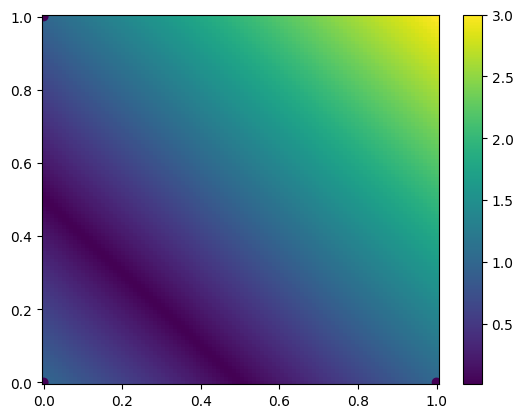

In [102]:
# Create a list of the points we want to input to .decision_function()
x_values = np.linspace(0, 1, 100) # list of 100 evenly spaced decimals between 0 and 1
y_values = np.linspace(0, 1, 100) 

# Find every possible combination of those x and y values
point_grid = list(product(x_values, y_values))

# Store the distances from the boundary for each point
distances = classifier.decision_function(point_grid)

# abs() returns the absolute value of a number
abs_distances = [abs(pt) for pt in distances]

# Turn the distances into a NumPy array
distances_matrix = np.reshape(abs_distances, (100, 100))

# Plot the distance data in heatmap
heatmap = plt.pcolormesh(x_values, y_values, distances_matrix)
plt.colorbar(heatmap) # Put legend on heatmap
plt.scatter([point[0] for point in data], 
            [point[1] for point in data], 
            c=labels) # Add points to plot
plt.show()

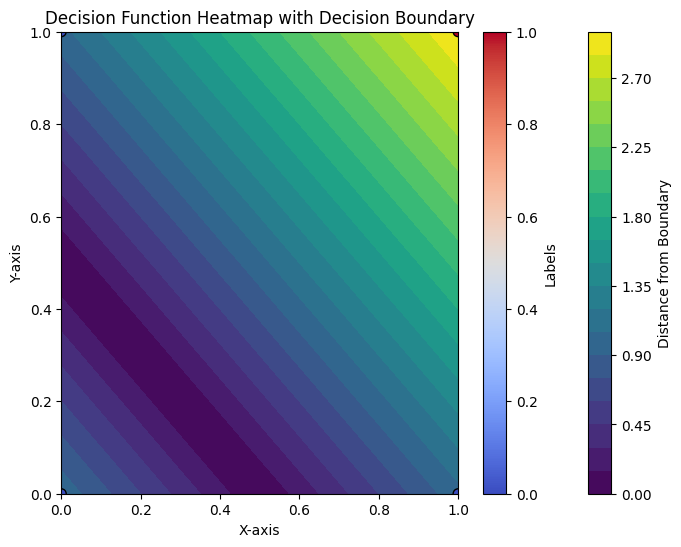

In [103]:
# Create a list of the points we want to input to .decision_function()
x_values = np.linspace(0, 1, 100)  # List of 100 evenly spaced decimals between 0 and 1
y_values = np.linspace(0, 1, 100)

# Find every possible combination of those x and y values
point_grid = list(product(x_values, y_values))

# Store the distances from the boundary for each point
distances = classifier.decision_function(point_grid)

# Abs() returns the absolute value of a number
abs_distances = [abs(pt) for pt in distances]

# Turn the distances into a NumPy array
distances_matrix = np.reshape(abs_distances, (100, 100))

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the heatmap with contour lines
heatmap = ax.contourf(x_values, y_values, distances_matrix, cmap='viridis', levels=20)

# Add contour lines to indicate decision boundaries
contours = ax.contour(x_values, y_values, distances_matrix, levels=[0], colors='red', linestyles='dashed')
ax.clabel(contours, inline=True, fontsize=10, fmt='Decision Boundary')

# Add a colorbar for reference
cbar = plt.colorbar(heatmap, ax=ax)
cbar.set_label('Distance from Boundary')

# Scatter plot of data points with colors representing labels
scatter = ax.scatter([point[0] for point in data], 
                     [point[1] for point in data], 
                     c=labels, cmap='coolwarm', edgecolors='k', s=50)
plt.colorbar(scatter, ax=ax, label='Labels')

# Set axis labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Decision Function Heatmap with Decision Boundary')

plt.show()


**Summary:** 
In the heatmap we see a purple line where the distances are 0.